# Neiss Datasets

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df_list = []
for year in range(2014, 2024):
    path = f'neiss{year}.tsv'
    print(path, '...', sep='')
    try:
        df_list.append(pd.read_csv(path, sep='\t'))
    except UnicodeDecodeError:
        print('Exception Caught')
        print(path, '...', sep='')
        print(len(pd.read_csv(path, sep='\t', encoding='ISO-8859-1')))
        df_list.append(pd.read_csv(path, sep='\t', encoding='ISO-8859-1'))
df = pd.concat(df_list, axis=0, ignore_index=True)

neiss2014.tsv...
neiss2015.tsv...
neiss2016.tsv...
neiss2017.tsv...
Exception Caught
neiss2017.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_7816/269486242.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  print(len(pd.read_csv(path, sep='\t', encoding='ISO-8859-1')))


386907


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_7816/269486242.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t', encoding='ISO-8859-1'))


neiss2018.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_7816/269486242.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t'))


neiss2019.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_7816/269486242.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t'))


neiss2020.tsv...
neiss2021.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_7816/269486242.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t'))


neiss2022.tsv...
neiss2023.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_7816/269486242.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t'))


In [3]:
# Drop records with missing Narrative_1 data
df.drop(df[df['Narrative_1'].isnull()].index, axis=0, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3520522 entries, 0 to 3520529
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CPSC_Case_Number   object 
 1   Treatment_Date     object 
 2   Age                int64  
 3   Sex                float64
 4   Race               float64
 5   Other_Race         object 
 6   Hispanic           float64
 7   Body_Part          float64
 8   Diagnosis          float64
 9   Other_Diagnosis    object 
 10  Body_Part_2        float64
 11  Diagnosis_2        float64
 12  Other_Diagnosis_2  object 
 13  Disposition        float64
 14  Location           float64
 15  Fire_Involvement   float64
 16  Product_1          float64
 17  Product_2          float64
 18  Product_3          float64
 19  Alcohol            float64
 20  Drug               float64
 21  Narrative_1        object 
 22  Stratum            object 
 23  PSU                float64
 24  Weight             float64
dtypes: float64(17), int64(1

In [5]:
def grep_count(pattern):
    return len(df[df['Narrative_1'].str.contains(pattern, na=False, case=False)])

a = grep_count('pedestrian')
b = grep_count('pedes')
c = grep_count('pedest')
d = grep_count('pedestrain')

print(f"pedestrian: {a}, pedes: {b}, pedest: {c}, pedestrain: {d}")

pedestrian: 1224, pedes: 1511, pedest: 1509, pedestrain: 247


In [6]:
peds = list(df[df['Narrative_1'].str.contains('pedestr|pedst', na=False, case=False)]['Narrative_1'])

In [7]:
len(peds)

1494

In [8]:
import random
import pyperclip

In [9]:
formatted = '\n'.join(peds)

In [10]:
print(formatted)

18 YOM BIBA AFTER BEING STRUCK BY A DUMP TRUCK WHILE RIDING HISSKATEBOARD JUST PTA. DX FRACTURED JAW, PEDESTRIAN STRUCK%
36 YOM BIBA, WAS STRUCK BY AN SUV WHILE RIDING A BICYCLE. PT HIT THEWINDSHIELD AND WAS WEARING A HELMET. DX WRIST FX, PEDESTRIAN STRUCK%
61 YOM REPORTS BEING PEDESTRIAN STRUCK BY MV AT UNK SPEED WHILE HEWAS RIDING HIS BICYCLE. DX WRIST SPRAIN, PED STRUCK%
18YOM PT COMPLAING OF LEFT ANKLE DEFORMITY *** MVC VS PEDESTRIAN PT RIDING BICYCLE HIT BY AUTO OPEN FRACTURE DX OPEN TIB/FIB FRACTURE#
A 28YOF PEDESTRIAN, HIT BY VEHICLE, BACKPACK CAUGHT ON MIRROR, PT SPUNAND HIT ARM ON VEHICLE, ARM PAIN
43 YOF DX KNEE PAIN - S/P PEDESTRIAN STRUCK BY BICYCLIST,HIT ON LEG PTA
26YOM WITH HIP & KNEE PAIN S/P PEDESTRIAN WHO WAS JOGGING ON THE ROAD WHEN HIT BY A CAR AT UNK SPEED. NO LOC.
29 YOM SWERVED ON BIKE TO AVOID A PEDESTRIAN AND LANDED ON SIDE.HELMET NS. DX: R RADIAL HEAD FX.
18YOF WITH LOW BACK PAIN S/P PEDESTRIAN HIT BY A CAR AT LOW SPEED AS SHE WAS CROSSING THE STREET WHILE WEA

In [11]:
sample = '\n'.join(random.sample(peds, 150))

In [12]:
pyperclip.copy(sample)

In [13]:
labeled_sample = pd.read_csv('ped_accident_labels.csv')

In [14]:
labeled_sample['Pedestrian Label'].value_counts()

Pedestrian Label
1    83
0    67
Name: count, dtype: int64

In [15]:
pd.concat([labeled_sample, df], axis=1)

,Narrative_1,Pedestrian Label,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight
0,16YOM PRESENTS AFTER BEING PEDESTRIAN STRUCK W...,0.0,140103999,01/01/2014,32,1.0,1.0,NaN,NaN,31.0,53.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1211.0,0.0,0.0,NaN,NaN,32 YOM CO PAIN IN THE CHEST AFTER FALLING WHIL...,S,98.0,80.0213
1,55 YOM DX NECK AND BACK PAIN - S/P PT PEDESTRI...,0.0,140104001,01/01/2014,18,1.0,1.0,NaN,NaN,82.0,51.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,910.0,0.0,0.0,NaN,NaN,18 YOM BURNED LT HAND WHILE POURING GASOLINE O...,S,98.0,80.0213
2,23YOM WITH ELBOW PAIN AFTER RIDING MOPED TO WO...,0.0,140104003,01/01/2014,31,2.0,1.0,NaN,NaN,37.0,64.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1807.0,0.0,0.0,NaN,NaN,31 YOF STATES SHE FELL THROUGH THE BATHROOM FL...,S,98.0,80.0213
3,50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDE...,1.0,140104670,01/01/2014,53,2.0,1.0,NaN,NaN,82.0,59.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,478.0,0.0,0.0,NaN,NaN,"53YOF WASHING DISHES AT HOME, A GLASS BROKE AN...",S,29.0,80.0213
4,^66YOM PEDESTRIAN WHO JUMPED TO GET OUT OF WAY...,0.0,140104672,01/01/2014,23,1.0,1.0,NaN,NaN,30.0,57.0,NaN,NaN,NaN,NaN,1.0,9.0,0.0,3286.0,0.0,0.0,NaN,NaN,"23YOM RIDING AN ATV, ROLLED OVER, HURT SHOULDE...",S,29.0,80.0213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520525,NaN,NaN,240303438,12/31/2023,83,1.0,0.0,NaN,0.0,75.0,53.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1878.0,0.0,0.0,0.0,0.0,83 YOM HERE FOR A FALL. HE GOT UP FROM BED TO ...,S,48.0,72.0202
3520526,NaN,NaN,240303439,12/31/2023,17,1.0,0.0,NaN,0.0,37.0,64.0,NaN,NaN,NaN,NaN,1.0,9.0,0.0,1205.0,0.0,0.0,0.0,0.0,"17 YOM HERE FOR RIGHT ANKLE PAIN, 2 DAYS PTA H...",S,48.0,72.0202
3520527,NaN,NaN,240303442,12/31/2023,97,2.0,0.0,NaN,0.0,85.0,71.0,DIZZINESS,NaN,NaN,NaN,1.0,1.0,0.0,4076.0,0.0,0.0,0.0,0.0,"97 YOF HERE VIA EMS FOR A FALL MONTHS PTA, SHE...",S,48.0,72.0202
3520528,NaN,NaN,240303444,12/31/2023,53,1.0,0.0,NaN,0.0,85.0,65.0,NaN,NaN,NaN,NaN,1.0,5.0,2.0,380.0,613.0,0.0,0.0,0.0,"53 YOM HERE VIA EMS FOR SMOKE INHALATION, CEIL...",S,48.0,72.0202


In [16]:
labeled_sample

,Narrative_1,Pedestrian Label
0,16YOM PRESENTS AFTER BEING PEDESTRIAN STRUCK W...,0
1,55 YOM DX NECK AND BACK PAIN - S/P PT PEDESTRI...,0
2,23YOM WITH ELBOW PAIN AFTER RIDING MOPED TO WO...,0
3,50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDE...,1
4,^66YOM PEDESTRIAN WHO JUMPED TO GET OUT OF WAY...,0
...,...,...
145,26 YOM WAS STRUCK BY A CAR WHILE SKATEBOARDING...,1
146,11 MOM DX FACE LACERATION - S/P PT PEDESTRIAN ...,1
147,33YOF WAS STRUCK BY A CAR ON WHILE ON HER BICY...,1
148,79YOM WAS STRUCK BY A GOLF CART WHEN DRIVER HI...,1


In [17]:
labeled_sample = labeled_sample.merge(df, on='Narrative_1', how='left')

In [18]:
labeled_sample[labeled_sample['Pedestrian Label']==-1][['Narrative_1', 'Treatment_Date', 'Pedestrian Label', 'Location', 'Product_1']].to_clipboard()

In [282]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight
0,140103999,01/01/2014,32,1.0,1.0,NaN,NaN,31.0,53.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1211.0,0.0,0.0,NaN,NaN,32 YOM CO PAIN IN THE CHEST AFTER FALLING WHIL...,S,98.0,80.0213
1,140104001,01/01/2014,18,1.0,1.0,NaN,NaN,82.0,51.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,910.0,0.0,0.0,NaN,NaN,18 YOM BURNED LT HAND WHILE POURING GASOLINE O...,S,98.0,80.0213
2,140104003,01/01/2014,31,2.0,1.0,NaN,NaN,37.0,64.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1807.0,0.0,0.0,NaN,NaN,31 YOF STATES SHE FELL THROUGH THE BATHROOM FL...,S,98.0,80.0213
3,140104670,01/01/2014,53,2.0,1.0,NaN,NaN,82.0,59.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,478.0,0.0,0.0,NaN,NaN,"53YOF WASHING DISHES AT HOME, A GLASS BROKE AN...",S,29.0,80.0213
4,140104672,01/01/2014,23,1.0,1.0,NaN,NaN,30.0,57.0,NaN,NaN,NaN,NaN,1.0,9.0,0.0,3286.0,0.0,0.0,NaN,NaN,"23YOM RIDING AN ATV, ROLLED OVER, HURT SHOULDE...",S,29.0,80.0213


In [20]:
values_Product_1 = [
    "1901", # 
    "1744", # Motorized vehicles, not elsewhere classified (three or more wheels).
    "5040", # Bicycles or accessories (excl. mountain or all-terrain bicycles).
    "5033", # Mountain or all-terrain bicycles or accessories.
    "3258", # 
    "1333", # Skateboards, unpowered or unspecified 
    "5022", # Scooters, powered
    "5023", # Scooters, unpowered
    "5024", # Scooters, unspecified.
    "5025", # Unicycles, powered Use: Hoverboards and powered skateboards 
    "1202", # 
    "3215", # 
    "3216", # Roller skating (activity/apparel/equipment).
    "1200", # Bull riding Use: Sport or recreational activity,
    "1283", # Unicycles, unpowered or unspecified
    "1301", # Tricycles, children's
    "3202", # Pedal-powered adult vehicles (3 or more wheels) .
    "1329", #
    "1398", # Balance bikes or push bikes for toddlers Use: Wheeled riding toys, unpowered (excl. bicycles and tricycles).
    "1910", #
    "3299", # Aerobics Use: Exercise (activity and apparel without equipment; incl. aerobics, stretching, walking, jogging and running (excl. track and field)
    "5035", # Minibikes, powered.
    "5042" # 
    ]

values_Location = ["4", "5"]

search_words = [
    "walking", "walk", "jogging", "jog", "running", "run", "on foot", "bystander",
    "standing", "biking", "bike", "roller skating", "roller skates", "skateboarding",
    "skateboard", "scootering", "scooter"
]

In [21]:
len(df[df['Location'].isin([4,5,9,0])])

1847613

In [22]:
df[df['Location'].isin([4,5,9,0])]['Product_1'].value_counts()

Product_1
1842.0    135795
5040.0    107160
1807.0    106153
1205.0    102079
1211.0     75157
           ...  
1441.0         1
958.0          1
533.0          1
1528.0         1
714.0          1
Name: count, Length: 793, dtype: int64

In [23]:
filtered_df = df[(df['Location']==4) | (df['Location']==5)]

In [24]:
removed_rows = df.loc[~df.index.isin(filtered_df.index)]

In [25]:
df.index.is_unique

True

In [26]:
len(df)

3520522

In [27]:
len(removed_rows)

3190954

In [28]:
to_check = removed_rows[removed_rows['Narrative_1'].str.contains('pedstr|pedes|struck by|hit by')][['CPSC_Case_Number', 'Narrative_1']]

In [29]:
df[df['CPSC_Case_Number']==191001824]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight
2102165,191001824,09/21/2019,26,1.0,0.0,NaN,0.0,33.0,53.0,NaN,NaN,NaN,NaN,2.0,9.0,0.0,1744.0,0.0,0.0,0.0,0.0,26 yom riding a scooter and hit by a car. dx ...,C,31.0,4.8283


In [30]:
to_check.to_clipboard()

In [31]:
pyperclip.copy('\n'.join(to_check))

In [32]:
len(filtered_df)

329568

In [33]:
filtered_df['Product_1'].value_counts().head(20)

Product_1
1807.0    56548
5040.0    53852
4076.0    21337
1842.0    14017
3299.0    10766
4074.0    10054
1679.0     7863
1884.0     6425
1615.0     5978
3215.0     5972
1333.0     5954
1893.0     4879
1871.0     4584
4057.0     3715
649.0      3472
3278.0     3189
5022.0     3173
1890.0     2858
611.0      2846
4056.0     2734
Name: count, dtype: int64

In [34]:
# Product number for floor
# Can be removed
prod_1807 = list(filtered_df[filtered_df['Product_1']==1807]['Narrative_1'])

In [35]:
# Product number for bed
# Can be removed
prod_4076 = list(filtered_df[filtered_df['Product_1']==4076]['Narrative_1'])

In [36]:
# Product number for stairs
# Can be removed
prod_1842 = list(filtered_df[filtered_df['Product_1']==1842]['Narrative_1'])

In [37]:
# Product number for Aerobics
# There are a number of confirmed pedestrian injuries for this product
prod_3299 = filtered_df[filtered_df['Product_1']==3299]

In [38]:
# Product number for Chair
# Can be removed
prod_4074 = list(filtered_df[filtered_df['Product_1']==4074]['Narrative_1'])

In [39]:
# Product number for Bathroom Stall
prod_1884 = list(filtered_df[filtered_df['Product_1']==1884]['Narrative_1'])

In [40]:
for prod in prod_1884:
    if 'auto' in prod:
        print(prod)

38 y/o F BIBA on a full trauma code activation s/p auto vs ped. Per EMS, pt was in *** when an automobile struck through the building causing the pt to become pinned inbetween the wall and the car. EMS notes decrease in sensation in pts LLE as well as abdominal tenderness. dx concussion, hip/ flank contusion


In [41]:
prods_to_remove = [1807, 4076, 1842, 4074]

In [42]:
final_df = filtered_df[~(filtered_df['Product_1'].isin(prods_to_remove))]

In [43]:
len(final_df)

227612

In [44]:
from transformers import BertTokenizer
from datasets import Dataset

/opt/anaconda3/envs/hf_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [108]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Function to tokenize
def tokenize_fn(batch):
    return tokenizer(batch['Narrative_1'], padding='max_length', truncation=True, max_length=128)

# Convert labeled DataFrame into Hugging Face Dataset
dataset_labeled = Dataset.from_pandas(df_labeled[['Narrative_1', 'label']])
dataset_labeled = dataset_labeled.map(tokenize_fn, batched=True)
dataset_labeled = dataset_labeled.rename_column("label", "labels")
dataset_labeled.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

NameError: name 'df_labeled' is not defined

In [69]:
texts = list(df.iloc[pd.DataFrame(df['Narrative_1'].apply(len)).sort_values(by='Narrative_1', ascending=False).head(1000).index]['Narrative_1'])

In [70]:
tokenized = tokenizer(texts, add_special_tokens=True, padding=False, truncation=False)

In [71]:
tokenized.keys()

dict_keys(['input_ids', 'attention_mask'])

In [72]:
tokens = []
for instance in tokenized.input_ids:
    tokens.append(len(instance))

In [73]:
# The narrative that will conatin the most amount of tokens will have 128 tokens, therefore I can safely set the truncate argument=128
max(tokens)

128

# Fine Tuning Distil-BERT

## Convert dataset to huggingface Dataset object

**Hugging Face Dataset Objects:** A special data structure that
- Is designed for efficient preprocessing and tokenization

- Works seamlessly with Hugging Face models and the Trainer API

- Supports powerful methods like .map() (for batching transformations)

- Automatically handles formatting for training (like batching and shuffling)


We then split the data into an 80/20 train test split

In [217]:
from datasets import Dataset

In [218]:
labeled_sample['Pedestrian Label']

0      0
1      0
2      0
3      1
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Pedestrian Label, Length: 150, dtype: int64

In [219]:
# Transforming the labeled dataset into a hugginface dataset object for efficient and seamless model tuning
text_label = labeled_sample[['Narrative_1', 'Pedestrian Label']]
text_label = text_label.rename(columns={'Narrative_1': 'text', 'Pedestrian Label': 'labels'})

dataset = Dataset.from_pandas(text_label)
dataset = dataset.train_test_split(test_size=0.2)

In [220]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 120
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 30
    })
})

# Tokenizing Data

We use the Hugging Face AutoTokenizer to create a DistilBERT-compatible tokenizer that converts each narrative into a format the model can understand (token IDs and attention masks).

We define a tokenize function that:
- truncates samples to a maximum of 128 tokens if too long
- pads samples to 128 tokens when too short

We use .map(batched=True) to efficiently apply it to all samples in the Hugging Face Dataset. The batched=True argument speeds up the process by processing multiple samples at once instead of one at a time.

In [221]:
from transformers import AutoTokenizer

In [222]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [223]:
def tokenize(sample):
    return tokenizer(
        sample['text'],
        padding='max_length',
        truncation=True,
        max_length=128
    )

In [224]:
results = dataset.map(tokenize, batched=True)

Map: 100%|██████████| 30/30 [00:00<00:00, 3074.78 examples/s]


In [225]:
# Example of the output of one sample
results['train'][0]

{'text': '6MOF WAS IN A STROLLER WHEN HIT BY A CAR DX: PEDESTRIAN INJURED IN TRAFFIC ADDIDENT, VOMITING',
 'labels': 1,
 'input_ids': [101,
  1020,
  5302,
  2546,
  2001,
  1999,
  1037,
  27244,
  2121,
  2043,
  2718,
  2011,
  1037,
  2482,
  1040,
  2595,
  1024,
  14662,
  5229,
  1999,
  4026,
  5587,
  5178,
  3372,
  1010,
  24780,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
 

# Setting up the Classification Model
- We are classifying entire inputs/sentences/sequences therefore we are doing a sequence classification task.
- Import AutoModelForSequenceClassification class which is instantiated from a pretrained model (distilBERT in this case) 
- Set up the mapping for the labels for interpretability as we are training the model

In [226]:
# We import AutoModelForSequenceClassification since we are trying to classify the entire input (sequence) at once
from transformers import AutoModelForSequenceClassification

In [227]:
# Create a mapping for the models predictions to help with interpretability
id2label = {0: "Not Pedestrian", 1: "Pedestrian"}
label2id = {"Not Pedestrian":0, "Pedestrian": 1}

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", 
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Low-Rank Adaptation

- We are using LoRA for fine-tune only a small number of parameters instead of the full model

In [228]:
# peft: Parameter Efficient Fine-Tuning
from peft import LoraConfig, get_peft_model

In [229]:
peft_config = LoraConfig(
    task_type='SEQ_CLS', # Defining the classification type to be Sequence Classification
    r=4, # Lora attention dimension (intrinsic rank of the low-rank matricies)
    lora_alpha=32, # Alpha Parameter for Lora scaling (like the learning rate)
    lora_dropout=0.01, # The dropout probability for Lora layers
    target_modules=['q_lin'] # We will only change the Query linear layer with our LoRA fine-tuning
)

In [230]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 628,994 || all params: 67,584,004 || trainable%: 0.9307


#  Configure and Run Training

In [231]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
import evaluate
import numpy as np
import torch

In [232]:
# Load the Hugging Face accuracy metric
accuracy = evaluate.load("accuracy")

# Define a metric function to use during evaluation
def compute_metrics(p):
    # p = (logits, true_labels)
    predictions, labels = p

    # Convert logits to predicted class index (0 or 1)
    # np.argmax selects the class with the highest score
    predictions = np.argmax(predictions, axis=1)

    # Compute accuracy by comparing predicted vs. true labels
    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

## Untrained Model Performance

In [233]:
random.seed(25)
sample = random.sample(list(labeled_sample['Narrative_1'].values), 5)
sample

['17YOM PRESENTED AT ED C/O OF PEDESTRIAN STRUCK. PT WAS HELMETED AND RIDING A BICYCLE WHEN A CAR HIT HIM HEAD-ON. PT HIT THE WINDSHIELD AGAINST THE FRONT OF HIS BODY AND LEFT SIDE OF HIS FACE.  DENIES ANY LOSS OF CONSCIOUSNESS. CURRENTLY COMPLAINING OF RIGHT-SIDED INGUINAL PAIN.  PT SUSTAINED ABRASIONS TO RIGHT INGUINAL REGION AND RIGHT CHEEK.  DX: PEDESTRIAN INJURED IN TRAFFIC ACCIDENT',
 '50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDESTRIAN HIT BY CAR THAT WAS BACKING UP. STATES WAS SITTING IN A CART WHEN HIT.',
 '13 YOM ***, TRIED TO DODGE PEDESTRIAN & FELL C/O ANKLE PAIN DX TRIPLANE ANKLE FRACTURE',
 '6YOM PRESENTS AFTER HE RAN INTO THE STREET AFTER A BALL AND WAS SIDESWIPED BY A CAR, FELL, AND HIT HIS ELBOW. DX: ELBOW ABRASION, TRAUMATIC HEMATOMA OF SCALP, MOTOR VEHICLE COLLSION WITH PEDESTRIAN',
 '41YOM PEDESTRIAN HIT BY A CAR AND PINNED UP AGAINST A DUMPSTER. DX: ABDOMINAL PAIN, BILATERAL LEG PAIN.']

In [234]:
print("Untrained model predictions")
print("----------------------------")

for text in sample:
    # Tokenize text
    inputs = tokenizer.encode(text, return_tensors='pt')
    # compute logits
    logits = model(inputs).logits
    # Convert logits to label
    predictions = torch.argmax(logits)
    
    print(text + ' - ' + id2label[predictions.item()] )
    
    

Untrained model predictions
----------------------------
17YOM PRESENTED AT ED C/O OF PEDESTRIAN STRUCK. PT WAS HELMETED AND RIDING A BICYCLE WHEN A CAR HIT HIM HEAD-ON. PT HIT THE WINDSHIELD AGAINST THE FRONT OF HIS BODY AND LEFT SIDE OF HIS FACE.  DENIES ANY LOSS OF CONSCIOUSNESS. CURRENTLY COMPLAINING OF RIGHT-SIDED INGUINAL PAIN.  PT SUSTAINED ABRASIONS TO RIGHT INGUINAL REGION AND RIGHT CHEEK.  DX: PEDESTRIAN INJURED IN TRAFFIC ACCIDENT - Not Pedestrian
50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDESTRIAN HIT BY CAR THAT WAS BACKING UP. STATES WAS SITTING IN A CART WHEN HIT. - Not Pedestrian
13 YOM ***, TRIED TO DODGE PEDESTRIAN & FELL C/O ANKLE PAIN DX TRIPLANE ANKLE FRACTURE - Not Pedestrian
6YOM PRESENTS AFTER HE RAN INTO THE STREET AFTER A BALL AND WAS SIDESWIPED BY A CAR, FELL, AND HIT HIS ELBOW. DX: ELBOW ABRASION, TRAUMATIC HEMATOMA OF SCALP, MOTOR VEHICLE COLLSION WITH PEDESTRIAN - Not Pedestrian
41YOM PEDESTRIAN HIT BY A CAR AND PINNED UP AGAINST A DUMPSTER. DX: ABDOMINAL

In [235]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [236]:
# Hyperparameters
lr = 0.001 # Size of optimization step
batch_size = 4 # number of examples processed per optimization step
num_epochs = 10 # number of times the model runs through training data

# Defining the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True
)

In [237]:
results

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 120
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 30
    })
})

In [238]:
trainer = Trainer(
    model=model, # our peft model
    args=training_args, # hyperparameters
    train_dataset=results['train'], # training data
    eval_dataset=results['test'], # testing data
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_7816/1539098249.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [239]:
text_label.isnull().sum()

text      0
labels    0
dtype: int64

In [240]:
print(len(results["train"]))  # Should print 120
print(len(results["test"]))   # Should print 30

120
30


In [241]:
print(results)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 120
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 30
    })
})


In [242]:
print(results["train"][0])

{'text': '6MOF WAS IN A STROLLER WHEN HIT BY A CAR DX: PEDESTRIAN INJURED IN TRAFFIC ADDIDENT, VOMITING', 'labels': 1, 'input_ids': [101, 1020, 5302, 2546, 2001, 1999, 1037, 27244, 2121, 2043, 2718, 2011, 1037, 2482, 1040, 2595, 1024, 14662, 5229, 1999, 4026, 5587, 5178, 3372, 1010, 24780, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [243]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.677709,{'accuracy': 0.5}
2,No log,0.410851,{'accuracy': 0.8333333333333334}
3,No log,0.635476,{'accuracy': 0.7333333333333333}
4,No log,0.582476,{'accuracy': 0.8666666666666667}
5,No log,0.758162,{'accuracy': 0.8666666666666667}
6,No log,0.820722,{'accuracy': 0.9}
7,No log,0.896247,{'accuracy': 0.8666666666666667}
8,No log,0.774787,{'accuracy': 0.8666666666666667}
9,No log,0.755815,{'accuracy': 0.8666666666666667}
10,No log,0.756826,{'accuracy': 0.9}


Trainer is attempting to log a value of "{'accuracy': 0.5}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8333333333333334}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.7333333333333333}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8666666666666667}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8666666666666667}" of type <class '

TrainOutput(global_step=300, training_loss=0.18615267435709634, metrics={'train_runtime': 49.7198, 'train_samples_per_second': 24.135, 'train_steps_per_second': 6.034, 'total_flos': 40319900467200.0, 'train_loss': 0.18615267435709634, 'epoch': 10.0})

In [ ]:
model.to('mps')

print("Trained model predictions")
print("----------------------------")

for text in sample:
    # Tokenize text
    inputs = tokenizer.encode(text, return_tensors='pt').to('mps')
    # compute logits
    logits = model(inputs).logits
    # Convert logits to label
    predictions = torch.argmax(logits)
    
    print(text + ' - ' + id2label[predictions.item()])

Trained model predictions
----------------------------
17YOM PRESENTED AT ED C/O OF PEDESTRIAN STRUCK. PT WAS HELMETED AND RIDING A BICYCLE WHEN A CAR HIT HIM HEAD-ON. PT HIT THE WINDSHIELD AGAINST THE FRONT OF HIS BODY AND LEFT SIDE OF HIS FACE.  DENIES ANY LOSS OF CONSCIOUSNESS. CURRENTLY COMPLAINING OF RIGHT-SIDED INGUINAL PAIN.  PT SUSTAINED ABRASIONS TO RIGHT INGUINAL REGION AND RIGHT CHEEK.  DX: PEDESTRIAN INJURED IN TRAFFIC ACCIDENT - Pedestrian
50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDESTRIAN HIT BY CAR THAT WAS BACKING UP. STATES WAS SITTING IN A CART WHEN HIT. - Pedestrian
13 YOM ***, TRIED TO DODGE PEDESTRIAN & FELL C/O ANKLE PAIN DX TRIPLANE ANKLE FRACTURE - Not Pedestrian
6YOM PRESENTS AFTER HE RAN INTO THE STREET AFTER A BALL AND WAS SIDESWIPED BY A CAR, FELL, AND HIT HIS ELBOW. DX: ELBOW ABRASION, TRAUMATIC HEMATOMA OF SCALP, MOTOR VEHICLE COLLSION WITH PEDESTRIAN - Pedestrian
41YOM PEDESTRIAN HIT BY A CAR AND PINNED UP AGAINST A DUMPSTER. DX: ABDOMINAL PAIN, BILATER

In [254]:
peds = pd.DataFrame(peds, columns=['Narrative_1']).merge(df, on='Narrative_1', how='left')

In [256]:
model.to('mps')

print('Classifying narratives containing pedestrian')
print('--------------------------------------------')

classifications = []
for narrative in peds['Narrative_1']:
    # Tokenize text
    inputs = tokenizer.encode(narrative, return_tensors='pt').to('mps')
    # compute logits
    logits = model(inputs).logits
    # Convert logits to label
    predictions = torch.argmax(logits)
    
    classifications.append(id2label[predictions.item()])

Classifying narratives containing pedestrian
--------------------------------------------


In [268]:
peds['Pedestrian'] = classifications

In [274]:
peds[['Narrative_1', 'Pedestrian']].sample(100, random_state=42).to_clipboard()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [275]:
len(peds)

1494

In [291]:
peds.iloc[479]

Narrative_1          60 YOM PRESENTS WITH RIB PAIN AFTER PEDESTRIAN...
CPSC_Case_Number                                             200521593
Treatment_Date                                              04/25/2020
Age                                                                 60
Sex                                                                1.0
Race                                                               0.0
Other_Race                                                         NaN
Hispanic                                                           0.0
Body_Part                                                         31.0
Diagnosis                                                         57.0
Other_Diagnosis                                                    NaN
Body_Part_2                                                        NaN
Diagnosis_2                                                        NaN
Other_Diagnosis_2                                                  NaN
Dispos

In [284]:
df[df['CPSC_Case_Number']==190213095]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight
1874754,190213095,02/03/2019,36,1.0,1.0,NaN,2.0,79.0,71.0,PAIN,NaN,NaN,NaN,1.0,5.0,0.0,4076.0,0.0,0.0,0.0,0.0,36YOM PEDESTRIAN COMING OUT OF A BUILDING WHEN...,L,42.0,61.8625


In [290]:
df[(df['Treatment_Date']=='01/30/2019') & (df['Age']==36)]['Narrative_1'].values

array(['36 YOF BENT AND HIT HEAD ON COUNTER BRUISING FACE WITH CONCUSSION',
       '36YOM SLIP AND FALL ON BLACK ICE ON DECK C/O LANDING ON L SHOULDER. HX OF DISLOCATIONS. / DISLOCATION L ACROMIOCLAVICULAR',
       '36 YO F LAC HAND-WASHING DISHES,SLIPPED FALLING ON FLOOR WITH A PLATE IN HAND',
       '36 YOF BECAME LIGHTHEADED WHILE WALKING UP STEPS AND FELL.DX:  CONT L ORBIT, LIP LAC.'],
      dtype=object)

In [297]:
performance_df = pd.read_csv('testing_model_performance.csv', index_col='index')

In [300]:
performance_df['Pedestrian'] = performance_df['Pedestrian'].map(label2id)

In [301]:
performance_df

,Narrative_1,Pedestrian,Human Label
index,,,
949,30YOF S/P AUTO VS PEDESTRIAN. PT WAS RIDING H...,1,1
900,42YOM PRESENTED AT ED C/O OF PEDESTRIAN STRUCK...,0,1
1339,19YOM PATIENT STATES HE WAS IN A CROSSWALK ON ...,0,0
983,40YOM PEDESTRIAN STRUCK BY CAR AND STUCKK UNDE...,1,1
958,38YOM S/P PED STRUCK PT WAS JOGGING IN THE BIK...,1,1
...,...,...,...
1460,6YOM PRESENTS AFTER HE RAN INTO THE STREET AFT...,1,1
538,33YOM PT STATES AROUND 8PM YESTERDAY WAS RIDIN...,0,0
123,51YOF DRIVER IN MVA THAT STRUCK A PERSON RIDIN...,0,0


In [302]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [304]:
print(classification_report(performance_df['Human Label'], performance_df['Pedestrian']))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        48
           1       0.83      0.75      0.79        52

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



In [308]:
import matplotlib.pyplot as plt

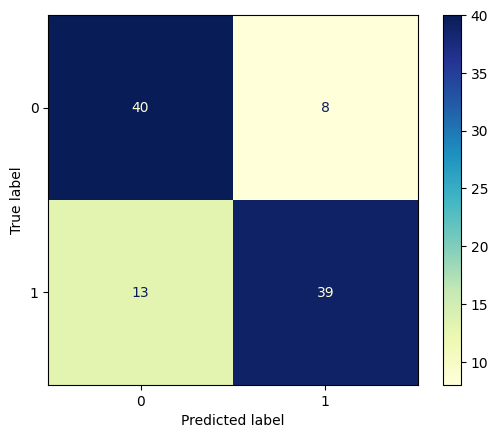

In [313]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(performance_df['Human Label'], performance_df['Pedestrian']))
cm.plot(cmap='YlGnBu')

In [316]:
performance_df[(performance_df['Pedestrian']==0) & (performance_df['Human Label']==1)]['Narrative_1'].values

array(['42YOM PRESENTED AT ED C/O OF PEDESTRIAN STRUCK. PATIENT WAS UNHELMETED BICYCLIST STRUCK FROM BEHIND BY CAR DRIVING 25-35 MPH.  PT FLEW OFF THE BIKE AND LANDED ON HIS BUTTOCK AND FOOSHED WITH LEFT ARM, ALSO WITH RIGHT FOOT TWISTING. MILD HA. COMPLAINING OF PARASPINAL BACK PAIN, LEFT BUTTOCK PAIN, LEFT WRIST PAIN, LEFT TONGUE LACERATION.  DX: MOTOR VEHICLE TRAFFIC ACCIDENT, STATUS POST FALL',
       '27YOM PRESENTED TO ED C/O PEDESTRAIN STRUCK, WHILE ON BIKE PT WAS STRUCK BY CAR. C/O SHOULDER PAIN AND KNEE PAIN. DX; FACIAL LACERATION,  MVA',
       '40YOM C/O KNEE PAIN S/P PEDESTRIAN STRUCK WHILE RIDING SCOOTER ACROSS CROSSWALK, HIT BY TRUCK ASS THE LIGHT TURNED GREEN DX: KNEE PAIN',
       '23YOM REPORTS HE WAS RIDING HIS BICYCLE WHEN HE WAS STRUCK BY A VEHICLE AND FLEW OVER THE HANDLEBARS LANDING ON HIS RIGHT SIDE. COMPLAINS OF LEG PAIN. DX PEDESTRIAN STRUCK',
       '30YOM PRESENTED TO ED C/O PEDESTRAIN STRUCK, PT STATED HE WAS RIDING HIS BICYCLE AT A CROSS SECTION AND WAS HIT

## First Model Notes
- The model seemed to misclassify some obvious ones where a biker was struck by a car. It would be good to feed it more of these as examples
- Some edge cases of electric scooters and other electric vehicles (dirt bikes, mopeds etc.) would be good to feed to the model. It was having some diffculty there